In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('research for ml.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   Your full name ?                                                                           551 non-null    object
 1   Your age ?                                                                                 551 non-null    int64 
 2   Your Gender                                                                                551 non-null    object
 3     Occupation:                                                                              549 non-null    object
 4   What is the primary reason you use social media?                                           551 non-null    object
 5   On average, how many hours per day do you spend on social

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Print unique values for each attribute in the DataFrame
for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique Values: {df[column].unique()}\n")


Column: Your full name ?
Unique Values: ['Abir Rahman' 'Yasin ' 'Samia Akter' 'MD. TANBIN AHMED '
 'SAKIBUL ALAM KHAN ' 'Atik Hasan Rochi ' 'G.M. Raian Al Razi'
 'Imon Ahmed' 'Fatema Afroz' 'riya sharmin' 'Mohtasin Bari'
 'Mahdi Neaz Mahi ' 'S.M. Saleh Ahammed Sium' 'Sakib Mahmud Raihan '
 'MD RISHADUL ISLAM SOURAV ' 'Golam Kibria' 'Saumik Roy'
 'Syeda Aria Ashfaque ' 'Turjo Das Dip' 'Muntadir mahmud'
 'Tabassum Shifa ' 'Nusrat Jahan Ful' 'Mst Momotaj Akter '
 'Nafisa Raihana' 'MD Abdul Awoyal' 'Nusrat Faraezi Ivy' 'Shafayet nayeen'
 'Rasel Mahmud' 'Raiyen Zayed Rakin' 'Badhan Ghosh ' 'Ahmad Ryan Mahmud'
 'Ritam sarkar' 'Tanvir Hasan Samad' 'Twaki hasan ' 'Md Naimur Rahman '
 'Sheikh Khurshid Alam Nabil' 'Nazrul Islam' 'Md.Al-Amin Khan Rifat'
 'Rajeeb Pramanik ' 'Sanjeda Dewan Mithila' 'Siam Mehedi Anik'
 'Priyanka Biswas' 'MD.IBRAHIM KHALILULLAH' 'Mehedi Hasan Munna '
 'Md Abu Bakar Siddique ' 'Sanaiya Dewan' 'Kazi Md. Wazeh Ullah Farhan '
 'Md. Zahirul Islam' 'প্রিয় বিশ্বাস ' 'Mahat

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


# Assuming your DataFrame is named 'df'
# Rename columns
df.rename(columns={
    "Timestamp": "timestamp",
    "Your full name ?": "name",
    "Your age ?": "age",
    "Your Gender ": "gender",
    "  Occupation:  ": "occupation",
    "What is the primary reason you use social media?": "social_media_reason",
    "On average, how many hours per day do you spend on social media?  ": "social_media_hours",
    "Have you been sleeping less?": "sleeping_less",
    "Have you had lack of interest in your daily activities?": "lack_interest_daily",
    "Have you lost interest in your hobbies?": "lost_interest_hobbies",
    "Have you been anxious ?": "anxious",
    "Have you had a sensation of impending doom?": "impending_doom",
    "Have you had difficulty in thinking clearly?": "thinking_difficulty",
    "Have you preferred to be alone?": "prefer_alone",
    "Have you felt unhappy?": "unhappy",
    "Have you felt hopeless?": "hopeless",
    "Have you been worried about yourself?": "worried_self",
    "Have you had indigestion": "indigestion",
    "Have you felt a sensation of tension in your neck and shoulders?": "neck_tension",
    "Have you had headaches?": "headaches",
    "Do you ever take breaks from social media because it affects your mental well-being?  ": "social_media_breaks",
    "Do you find yourself comparing your life to others based on what you see on social media?": "compare_life",
    "Do you use social media to seek emotional support or help when feeling down?": "seek_support"
}, inplace=True)


# Drop unnecessary columns
df.drop(columns=[ "name"], inplace=True)


In [ ]:
# Print unique values for each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("-" * 50)


Unique values in 'age':
[16 18 19 20 21 22 23 24 25 26 27 28 29 34 35 39 40 41 46 47 48 53 32 30
 33 17 31]
--------------------------------------------------
Unique values in 'gender':
['Male' 'Female' 'MAle' 'female' 'male']
--------------------------------------------------
Unique values in 'occupation':
['Student' 'Unemloyed' nan 'Employed' 'Others' 'employed']
--------------------------------------------------
Unique values in 'social_media_reason':
['Both' 'Personal (connecting with friends/family, entertainment)'
 'Professional (work, networking)' 'Others'
 'Professional (networking, work-related purposes)']
--------------------------------------------------
Unique values in 'social_media_hours':
['1-3 hours' '5-6 hours' '3-5 hours' '6-8 hours' 'Less than 1 hour'
 '8-10 hours']
--------------------------------------------------
Unique values in 'sleeping_less':
['Sometimes' 'Never' 'Mostly' 'Always' "Don't know"]
--------------------------------------------------
Unique values i


Counts for 'age':
count    551.000000
mean      23.557169
std        4.809829
min       16.000000
25%       21.000000
50%       22.000000
75%       24.000000
max       53.000000
Name: age, dtype: float64


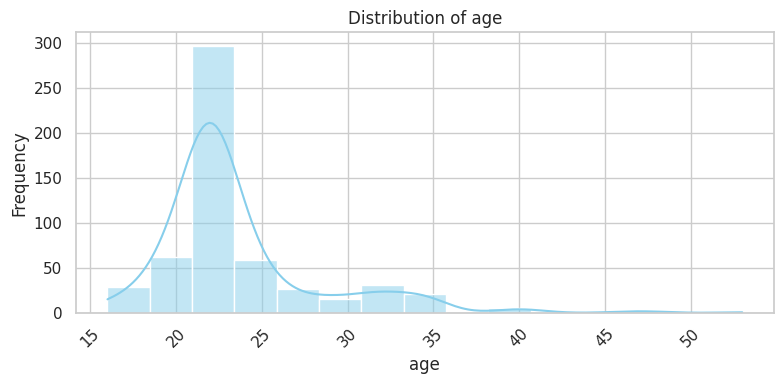


Counts for 'gender':
gender
Male      325
Female    169
female     55
MAle        1
male        1


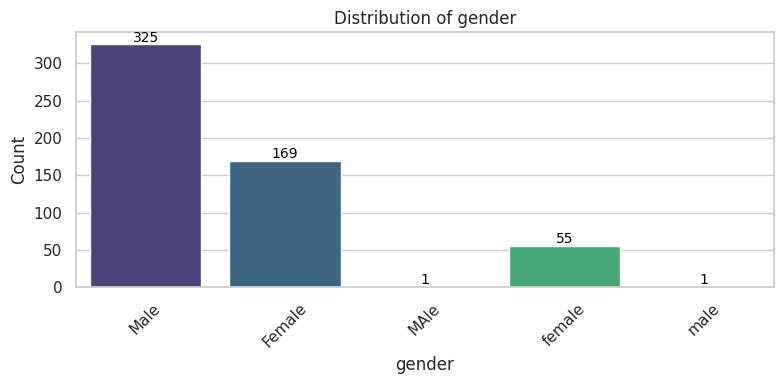


Counts for 'occupation':
occupation
Student      445
employed      53
Employed      40
Unemloyed      7
Others         4


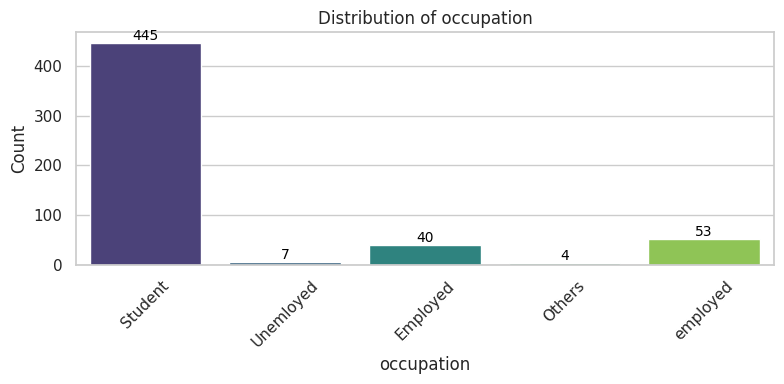


Counts for 'social_media_reason':
social_media_reason
Personal (connecting with friends/family, entertainment)    256
Both                                                        228
Professional (networking, work-related purposes)             46
Professional (work, networking)                              12
Others                                                        9


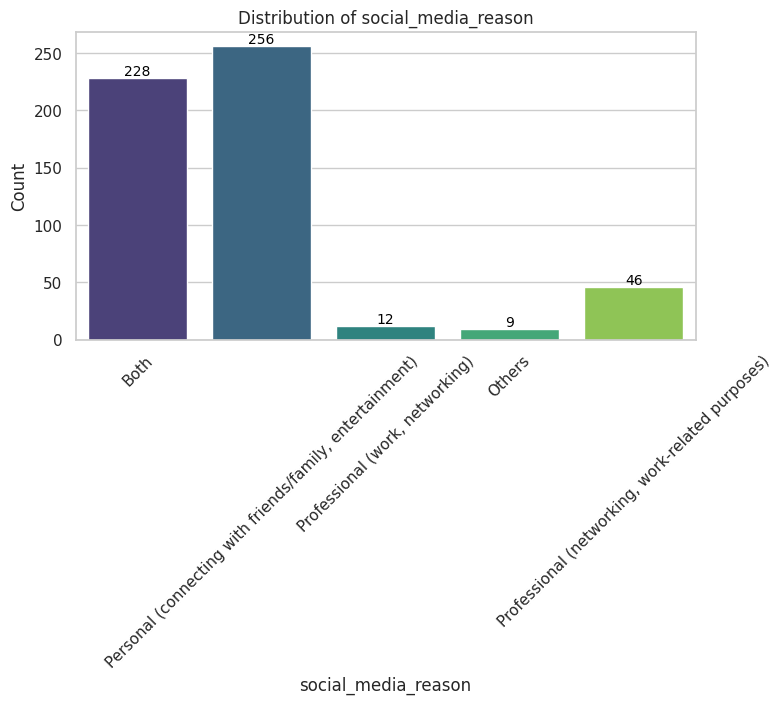


Counts for 'social_media_hours':
social_media_hours
1-3 hours           157
3-5 hours           154
5-6 hours            88
6-8 hours            78
8-10 hours           42
Less than 1 hour     32


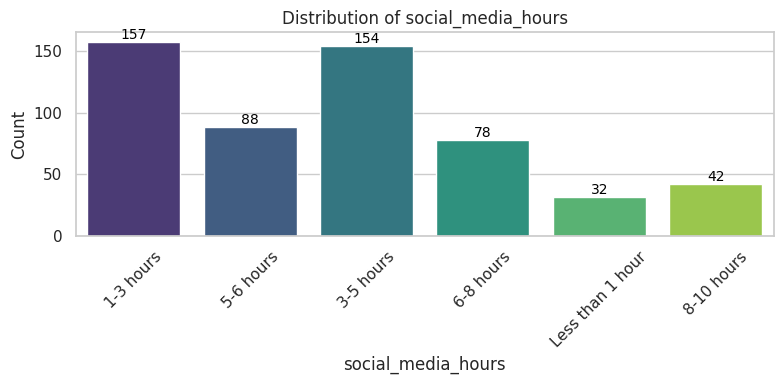


Counts for 'sleeping_less':
sleeping_less
Sometimes     275
Mostly        113
Never          87
Always         64
Don't know     12


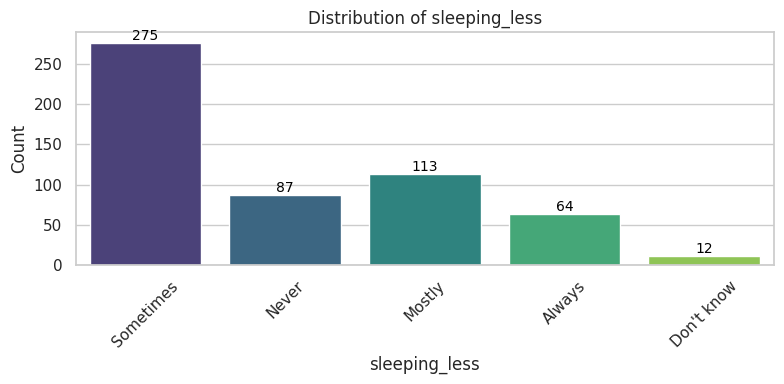


Counts for 'lack_interest_daily':
lack_interest_daily
Sometimes     293
Mostly        111
Never          97
Always         35
Don't Know     15


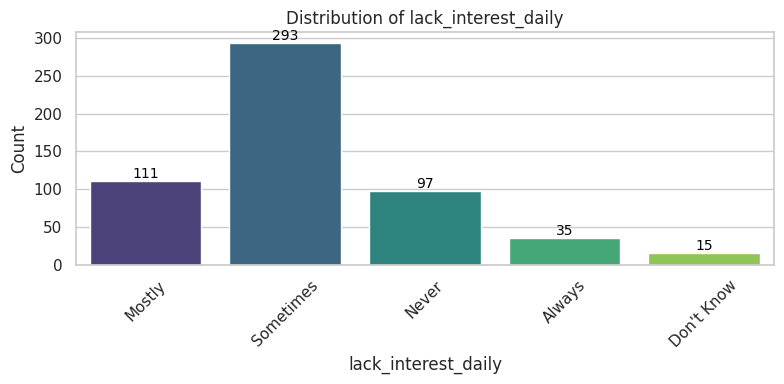


Counts for 'lost_interest_hobbies':
lost_interest_hobbies
Never         201
Sometimes     189
Mostly         98
Always         50
Don't know     13


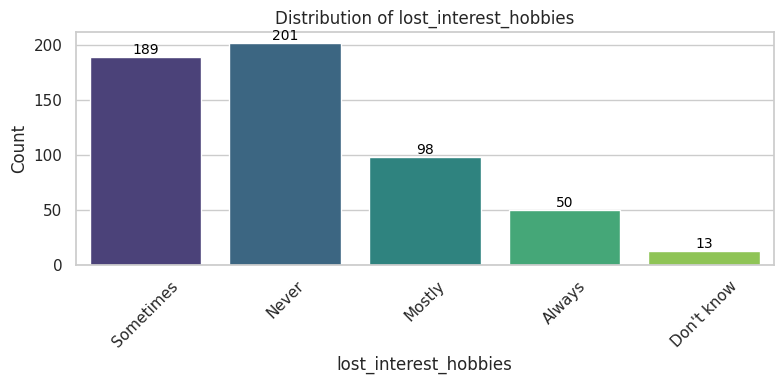


Counts for 'anxious':
anxious
Sometimes     275
Never         104
Mostly         93
Always         48
Don't know     31


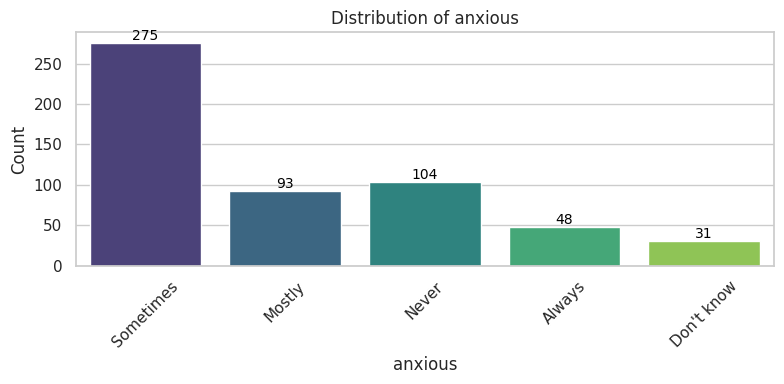


Counts for 'impending_doom':
impending_doom
Never         199
Sometimes     188
Don't know     82
Mostly         47
Always         35


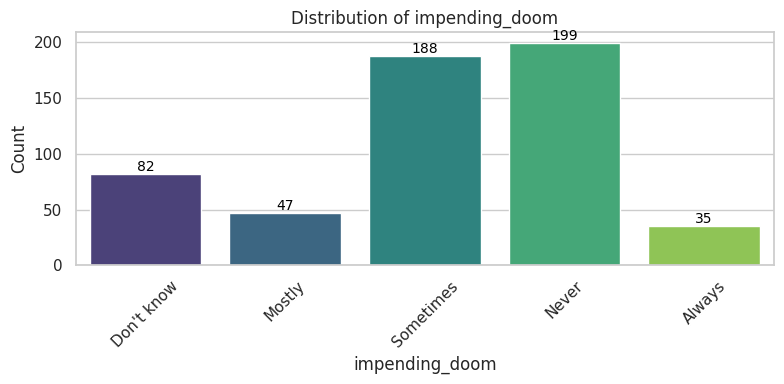


Counts for 'thinking_difficulty':
thinking_difficulty
Sometimes     258
Never         160
Mostly         78
Always         42
Don't know     13


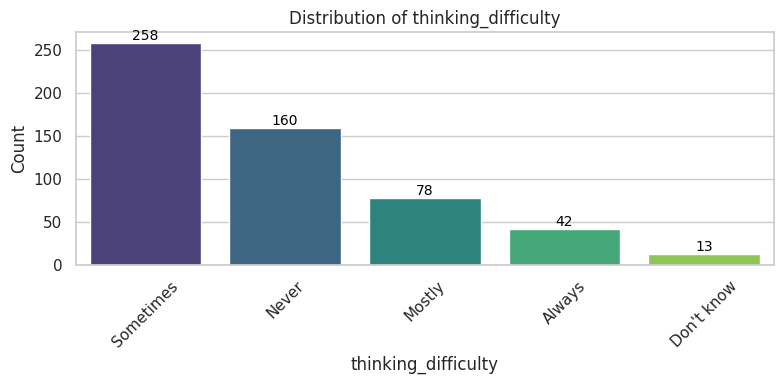


Counts for 'prefer_alone':
prefer_alone
Sometimes     186
Always        137
Never         123
Mostly         94
Don't know     11


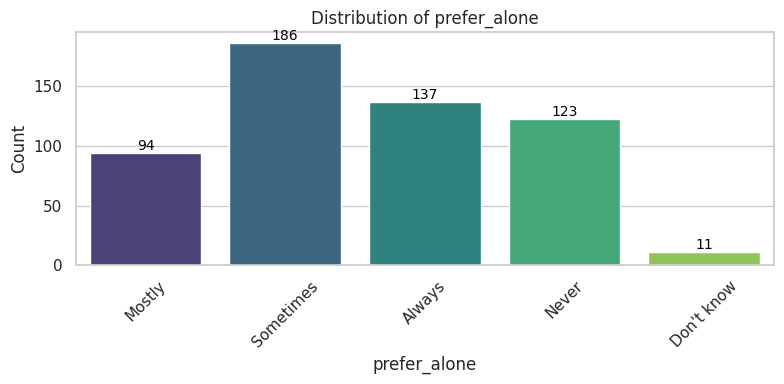


Counts for 'unhappy':
unhappy
Sometimes     267
Never         151
Mostly         68
Always         41
Don't Know     24


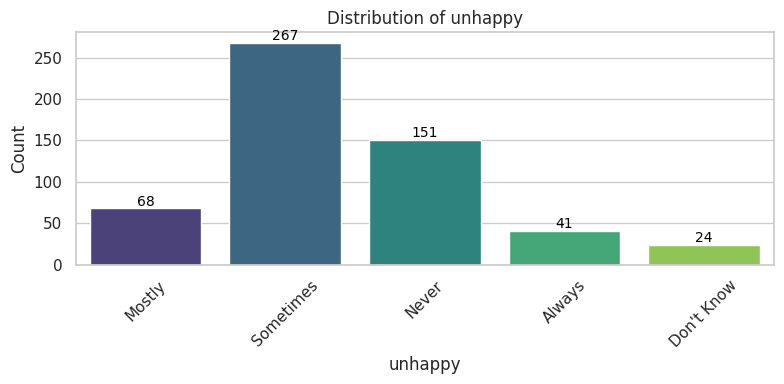


Counts for 'hopeless':
hopeless
Sometimes     211
Never         189
Mostly         82
Always         61
Don't know      8


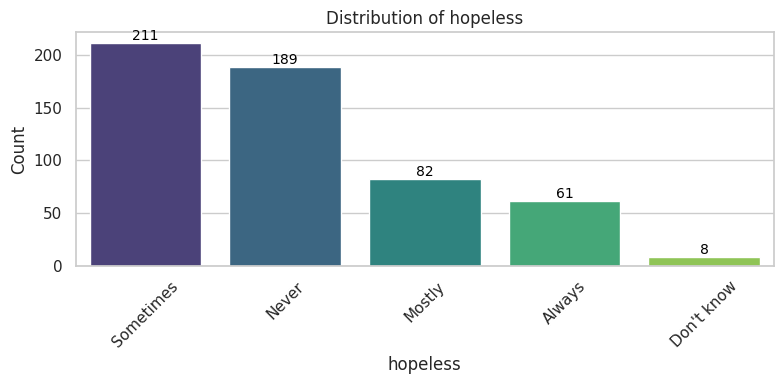


Counts for 'worried_self':
worried_self
Sometimes     196
Always        124
Never         116
Mostly        106
Don't know      9


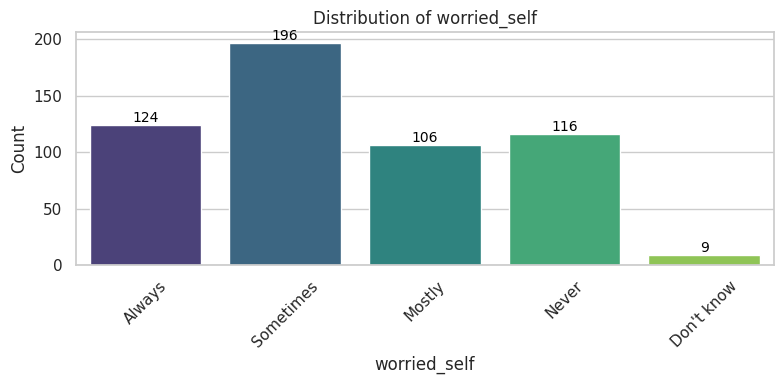


Counts for 'indigestion':
indigestion
Sometimes     271
Never         165
Don't know     67
Mostly         29
Always         19


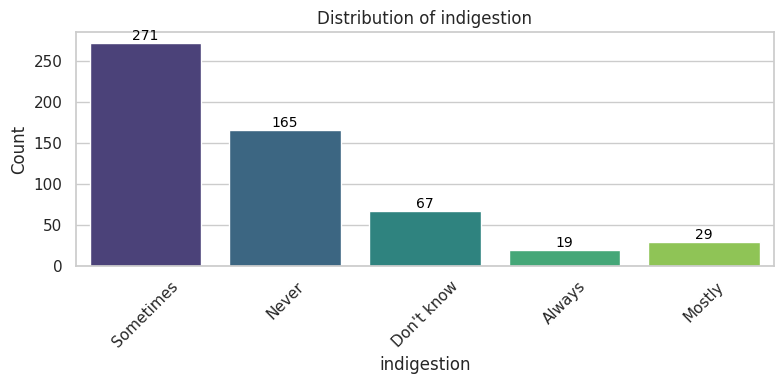


Counts for 'neck_tension':
neck_tension
Sometimes     214
Never         133
Mostly         99
Always         53
Don't know     52


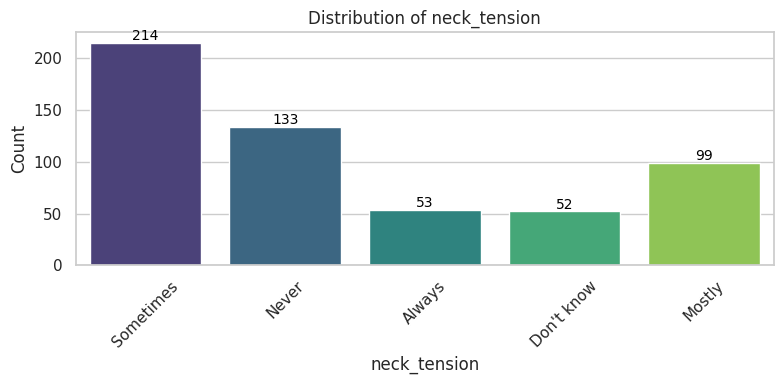


Counts for 'headaches':
headaches
Sometimes     332
Never          99
Mostly         82
Always         33
Don't know      5


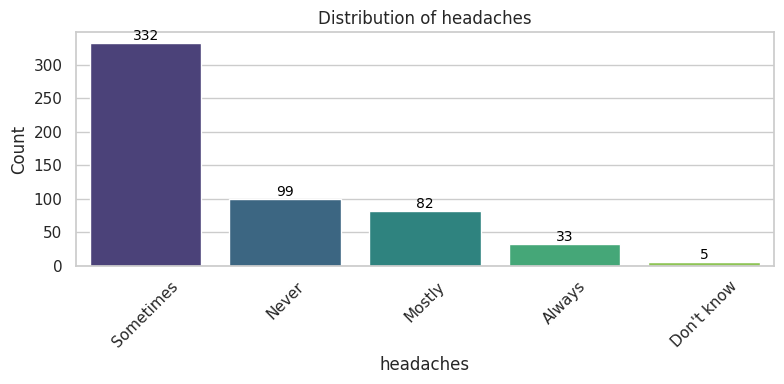


Counts for 'social_media_breaks':
social_media_breaks
Yes    364
No     187


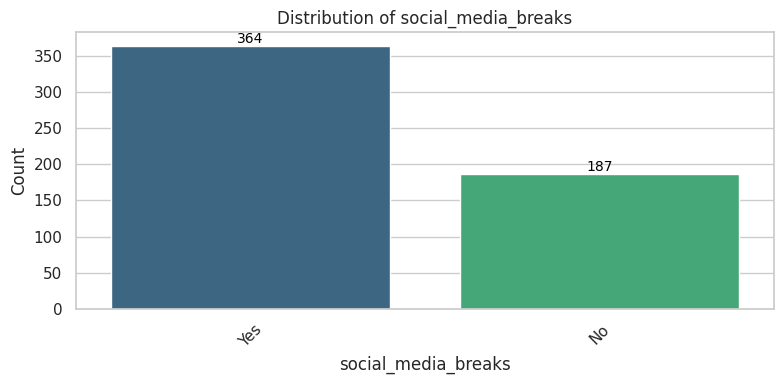


Counts for 'compare_life':
compare_life
Sometimes     266
Never         208
Mostly         33
Always         28
Don't know     16


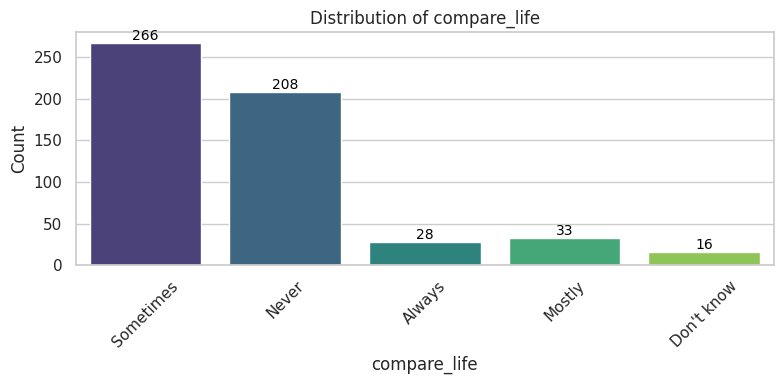


Counts for 'seek_support':
seek_support
Never         275
Sometimes     135
Always         67
Mostly         43
Don't know     31


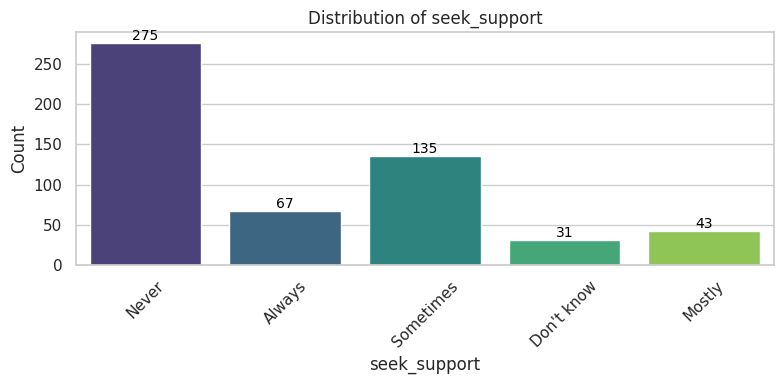

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions_with_counts(df):
    # Set the plot style
    sns.set(style="whitegrid")

    # Loop through each column in the dataset
    for column in df.columns:
        print(f"\nCounts for '{column}':")  # Print the counts for the column

        if df[column].dtype == 'object' or df[column].nunique() < 20:
            # Categorical or columns with fewer unique values
            counts = df[column].value_counts()
            print(counts.to_string())  # Print counts in tabular form

            plt.figure(figsize=(8, 4))  # Adjust the figure size
            ax = sns.countplot(data=df, x=column, palette='viridis')
            plt.title(f'Distribution of {column}')
            plt.ylabel('Count')
            plt.xlabel(column)

            # Annotate bars with counts
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        else:
            # For numerical attributes
            print(df[column].describe())  # Print summary statistics for numerical columns

            plt.figure(figsize=(8, 4))  # Adjust the figure size
            sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=15)
            plt.title(f'Distribution of {column}')
            plt.ylabel('Frequency')
            plt.xlabel(column)

        plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
        plt.tight_layout()  # Adjust layout to avoid overlap
        plt.show()

# Example usage
# Replace df with your actual dataset
# df = pd.read_csv('your_dataset.csv')
plot_distributions_with_counts(df)


In [ ]:


# Handle missing values in 'occupation'
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Convert 'age' to numeric
df['age'] = df['age'].astype(int)

# Convert Likert Scale columns into numerical columns
likert_scale_columns = ['sleeping_less', 'lack_interest_daily', 'lost_interest_hobbies', 'anxious', 'impending_doom', 'thinking_difficulty', 'prefer_alone', 'unhappy', 'hopeless', 'worried_self', 'indigestion', 'neck_tension', 'headaches', 'compare_life', 'seek_support']
likert_scale_mapping = {
   "Never": 0,
   "Sometimes": 1,
   "Mostly": 2,
   "Always": 3,
   "Don't know": 4
}

# Map the values first, then fillna after
for col in likert_scale_columns:
  df[col] = df[col].map(likert_scale_mapping)
  df[col].fillna(df[col].mode()[0], inplace=True)
  df[col] = df[col].astype('int')

# Convert `social_media_hours` which is the target attribute to an ordered categorical variable
hours_categories = ['Less than 1 hour', '1-3 hours', '3-5 hours', '5-6 hours', '6-8 hours', '8-10 hours']

df['social_media_hours'] = pd.Categorical(df['social_media_hours'], categories=hours_categories, ordered=True)

# Convert social media hours into numerical by treating them as 1-6 with equidistant intervals
df['social_media_hours'] = df['social_media_hours'].cat.codes + 1

# Convert binary `social_media_breaks` to binary
df['social_media_breaks'] = df['social_media_breaks'].map({'Yes': 1, 'No': 0})

# Ensure consistent categorical values
categorical_columns = ["gender", "occupation", "social_media_reason"]
for col in categorical_columns:
  df[col] = df[col].str.lower()
df.head()


,age,gender,occupation,social_media_reason,social_media_hours,sleeping_less,lack_interest_daily,lost_interest_hobbies,anxious,impending_doom,...,prefer_alone,unhappy,hopeless,worried_self,indigestion,neck_tension,headaches,social_media_breaks,compare_life,seek_support
0,16,male,student,both,2,1,2,1,1,4,...,2,2,1,3,1,1,1,1,1,0
1,16,male,unemloyed,"personal (connecting with friends/family, ente...",4,1,1,0,2,2,...,1,1,1,1,1,0,0,1,1,3
2,18,female,student,both,2,1,1,2,1,1,...,1,1,1,2,1,1,1,0,1,1
3,18,female,student,both,2,1,1,2,1,1,...,1,1,1,1,1,1,1,0,1,1
4,18,female,student,both,2,1,1,2,1,1,...,1,1,1,1,1,1,1,0,1,1


In [ ]:



# Feature scaling (MinMaxScaler for 0-1 scaling)
scaler = MinMaxScaler()
numerical_columns = ['age', 'social_media_hours', 'sleeping_less', 'lack_interest_daily', 'lost_interest_hobbies', 'anxious', 'impending_doom',
                    'thinking_difficulty', 'prefer_alone', 'unhappy', 'hopeless', 'worried_self', 'indigestion', 'neck_tension', 'headaches', 'social_media_breaks']
scaled_features = scaler.fit_transform(df[numerical_columns])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_columns)


# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)


# Concatenate the encoded columns and scaled numerical columns
df = pd.concat([scaled_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [ ]:
df.head()

,age,social_media_hours,sleeping_less,lack_interest_daily,lost_interest_hobbies,anxious,impending_doom,thinking_difficulty,prefer_alone,unhappy,...,gender_male,occupation_employed,occupation_others,occupation_student,occupation_unemloyed,social_media_reason_both,social_media_reason_others,"social_media_reason_personal (connecting with friends/family, entertainment)","social_media_reason_professional (networking, work-related purposes)","social_media_reason_professional (work, networking)"
0,0.000000,0.2,0.25,0.666667,0.25,0.25,1.00,0.25,0.50,0.666667,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.6,0.25,0.333333,0.00,0.50,0.50,0.00,0.25,0.333333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.054054,0.2,0.25,0.333333,0.50,0.25,0.25,0.25,0.25,0.333333,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.054054,0.2,0.25,0.333333,0.50,0.25,0.25,0.25,0.25,0.333333,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.054054,0.2,0.25,0.333333,0.50,0.25,0.25,0.25,0.25,0.333333,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Inertia: 843.01
Silhouette Score: 0.35


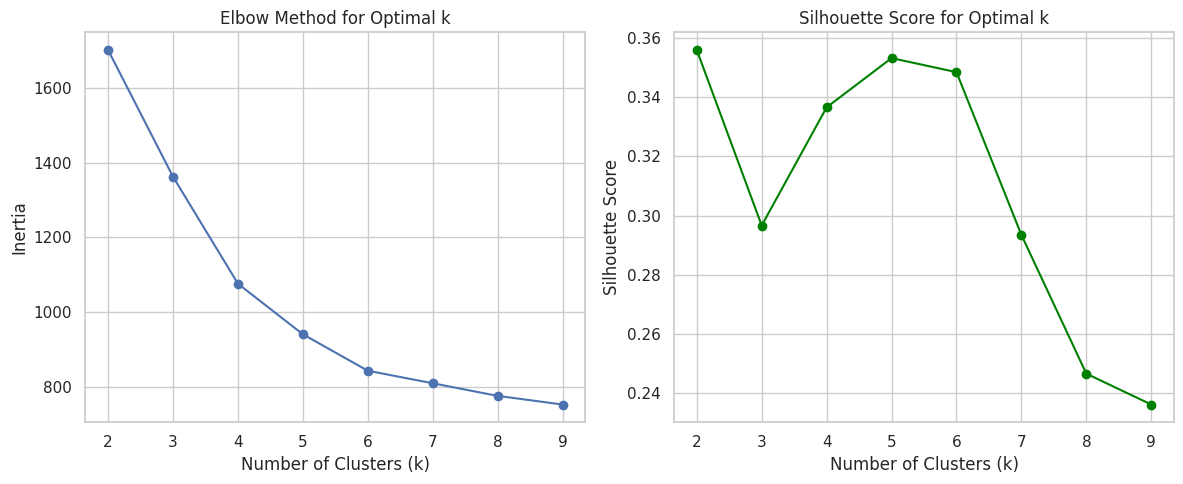

In [ ]:


# Perform clustering
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)  # Start with same num clusters as social_media_hours categories
df['cluster'] = kmeans.fit_predict(df)


# Evaluate the clusters using inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(df, df['cluster'])

print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")



# Elbow Method for k-Means
inertia_values = []
silhouette_values = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette_score(df, kmeans.labels_))

# Visualize Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Visualize Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_values, marker='o', color='green')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Analyze Cluster Characteristics

cluster_centers = df.groupby(df['cluster']).mean()
print("\nCluster Centers:\n", cluster_centers)

# Save cluster centers to CSV
cluster_centers.to_csv("cluster_characteristics.csv")


Cluster Centers:
               age  social_media_hours  sleeping_less  lack_interest_daily  \
cluster                                                                     
0        0.406580            0.421739       0.336957             0.391304   
1        0.163189            0.453165       0.344937             0.392405   
2        0.161973            0.370629       0.330420             0.375291   
3        0.154791            0.513131       0.328283             0.387205   
4        0.427257            0.451064       0.297872             0.319149   
5        0.163346            0.510949       0.355839             0.406326   

         lost_interest_hobbies   anxious  impending_doom  thinking_difficulty  \
cluster                                                                         
0                     0.271739  0.331522        0.353261             0.211957   
1                     0.319620  0.344937        0.392405             0.256329   
2                     0.195804  0.283217

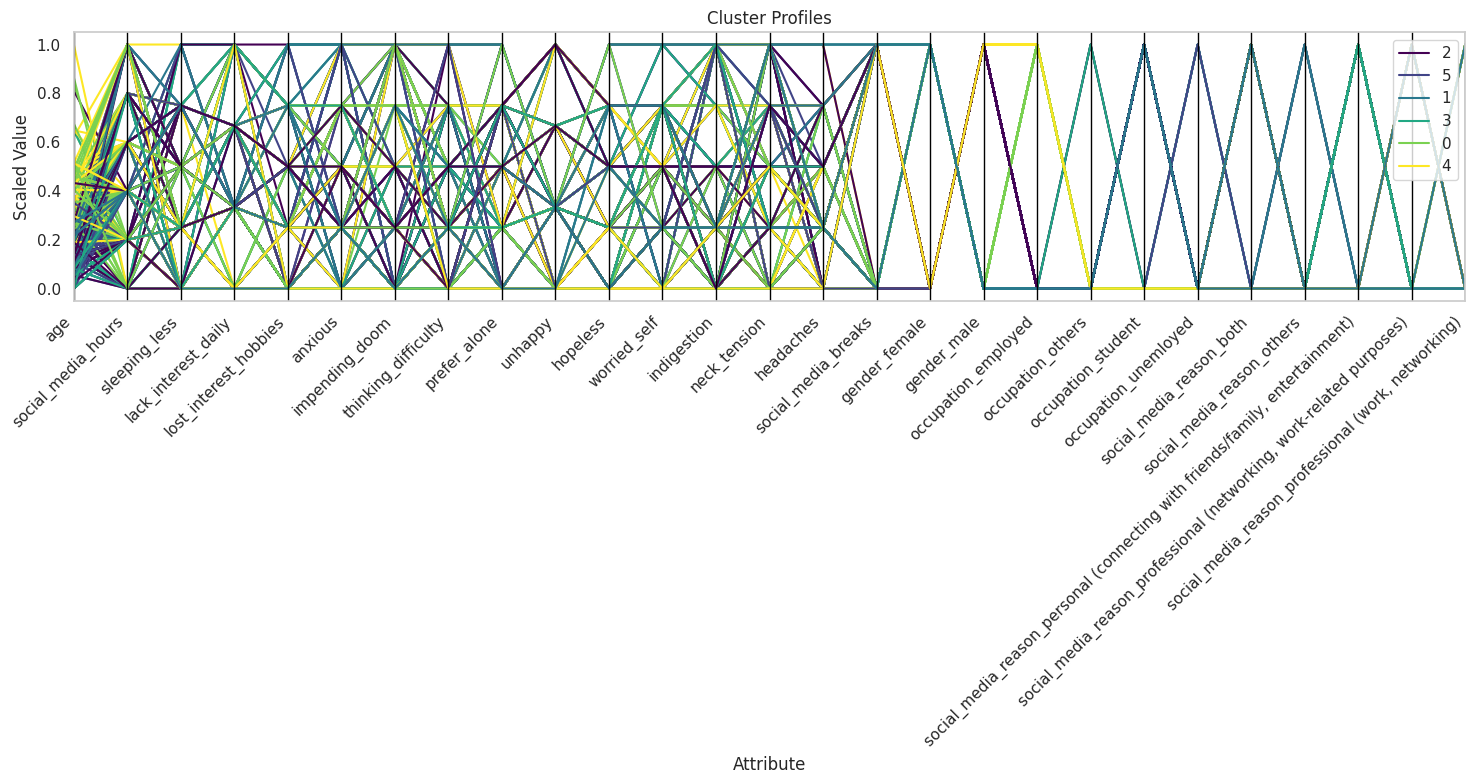

In [ ]:
# Visualize the profiles of each cluster
plt.figure(figsize=(15, 8))
parallel_coordinates(df, class_column='cluster', cols=df.columns.drop('cluster'), color = plt.cm.get_cmap('viridis', 6).colors)
plt.title('Cluster Profiles')
plt.xlabel('Attribute')
plt.ylabel('Scaled Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

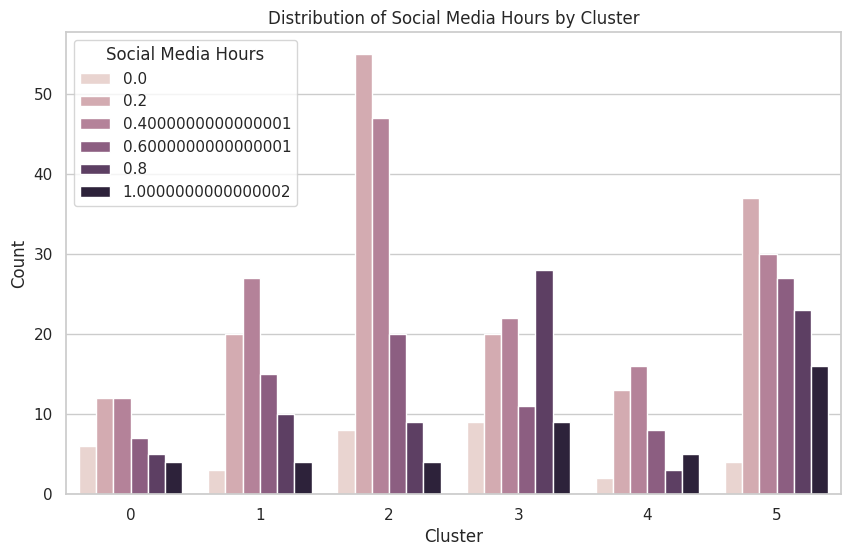

In [ ]:
# Visualizing distribution of social_media_hours in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='social_media_hours', data=df)
plt.title('Distribution of Social Media Hours by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Social Media Hours')
plt.show()

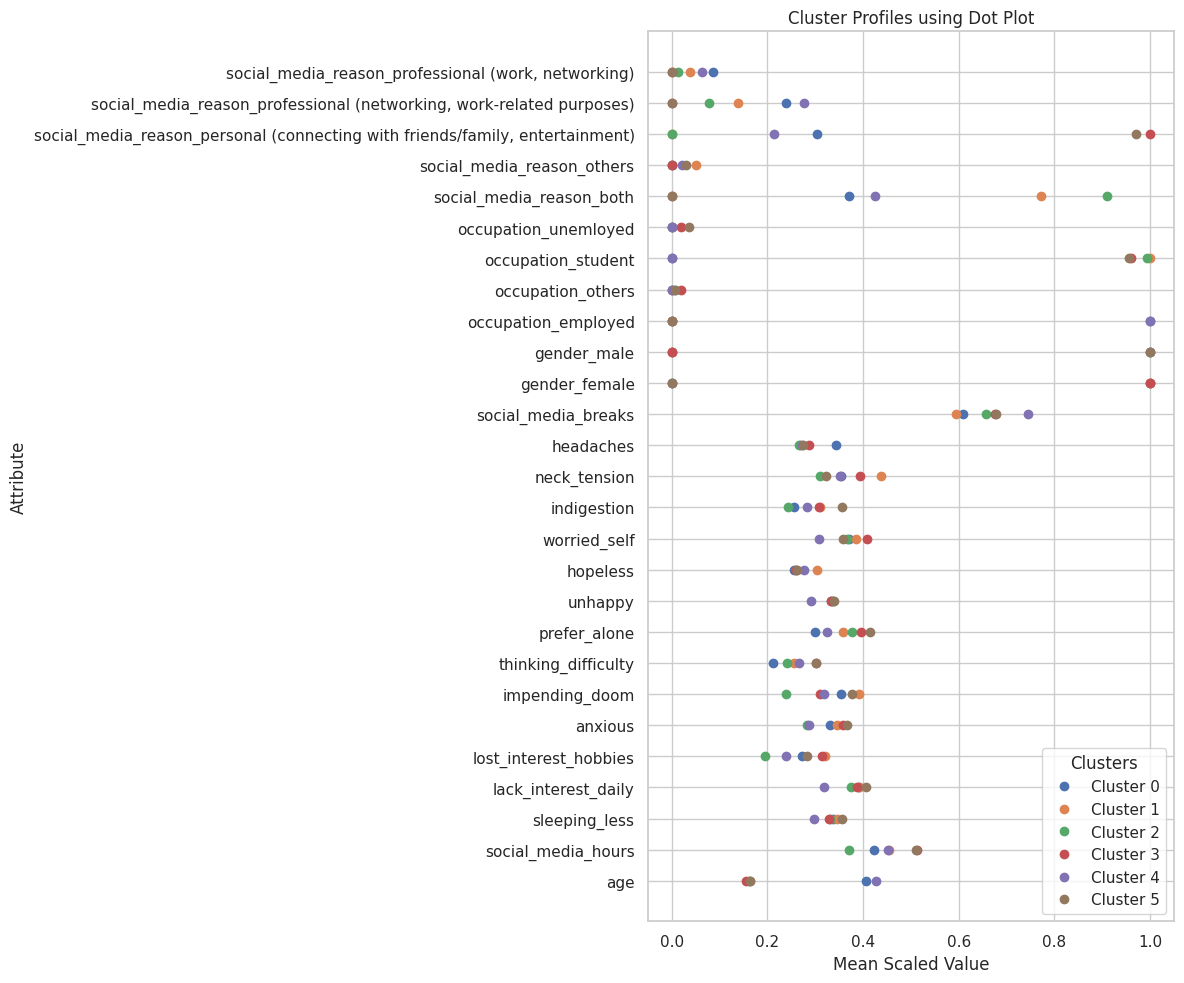

In [ ]:
# Generate Dot Plot
cluster_centers = df.groupby('cluster').mean().T
plt.figure(figsize=(12, 10))
for i in range(len(cluster_centers.columns)):
    plt.plot(cluster_centers.iloc[:,i], cluster_centers.index, marker='o', linestyle='', label = f"Cluster {i}")
plt.xlabel('Mean Scaled Value')
plt.ylabel('Attribute')
plt.title('Cluster Profiles using Dot Plot')
plt.legend(title = "Clusters")
plt.tight_layout()
plt.show()

In [ ]:
#Cluster 0: The Minimalists: These individuals have the lowest engagement with social media, suggesting they might be less reliant on it or prioritize other activities.
#
#Cluster 1: The Anxious Moderates: These users engage with social media at a moderate level, but also show higher levels of anxiety. This cluster might benefit from strategies to mitigate the negative impacts of social media on mental well-being.
#
#Cluster 2: The Working Professionals: This group is characterized by higher rates of employment, suggesting they are likely using social media in a way that fits with their work life.
#
#Cluster 3: The Balanced Individuals: These individuals have a mix of social media use and mental health symptoms slightly above zero.
#
#Cluster 4: The Average Users: This group represents the average level of engagement with social media.
#
#Cluster 5: The Personal Connection Seekers: Social media is likely a more personal space for this group, which may warrant further investigation into their online experiences and social support networks.

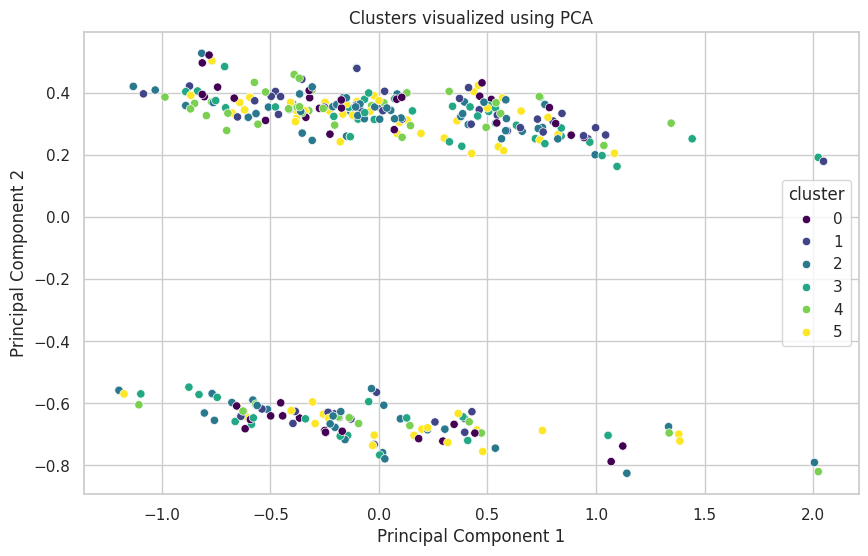

In [ ]:
# PCA for 2D Scatter Plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_df, palette = 'viridis')
plt.title('Clusters visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#Cluster 5 (Yellow): This cluster is mostly located on the right-hand side of the graph, particularly at the higher end of Principal Component 1. There's also a small group far on the left. These are the most well-separated and distinct points, indicating that these individuals have traits and attributes that significantly differentiate them from the rest of the population based on the two largest sources of variance in the data.
#
#Cluster 1 (Blue): This cluster is in the middle of the graph for both Principal Component 1 and 2.
#
#Cluster 0 (Purple): This cluster overlaps a lot with Cluster 1, indicating less distinction between the two.
#
#Cluster 2 (Teal): This cluster is relatively close together and overlaps with Cluster 0 and 1.
#
#Cluster 3 (Light Green): These clusters seem to have a high variance in both PC1 and PC2, as they are very spread out in the graph. This cluster is not very well defined, and overlaps a lot with the other clusters, especially clusters 0,1,2, and 4.
#
#Cluster 4 (Light Blue): This cluster overlaps a lot with Cluster 1, indicating less distinction between the two.
#
#Key Takeaways
#
#Distinct Group: Cluster 5 (Yellow) is distinct from all the other clusters, likely representing a unique segment of the population with defining characteristics.
#
#Overlapping Clusters: The lack of separation between clusters 0, 1, 2, 3, and 4 suggests these clusters may not be very distinct based on the first two principal components. They may share many similar characteristics or variations beyond these two components.
#
#Data Reduction: The PCA plot helps visualize which clusters can be separated using only two components.

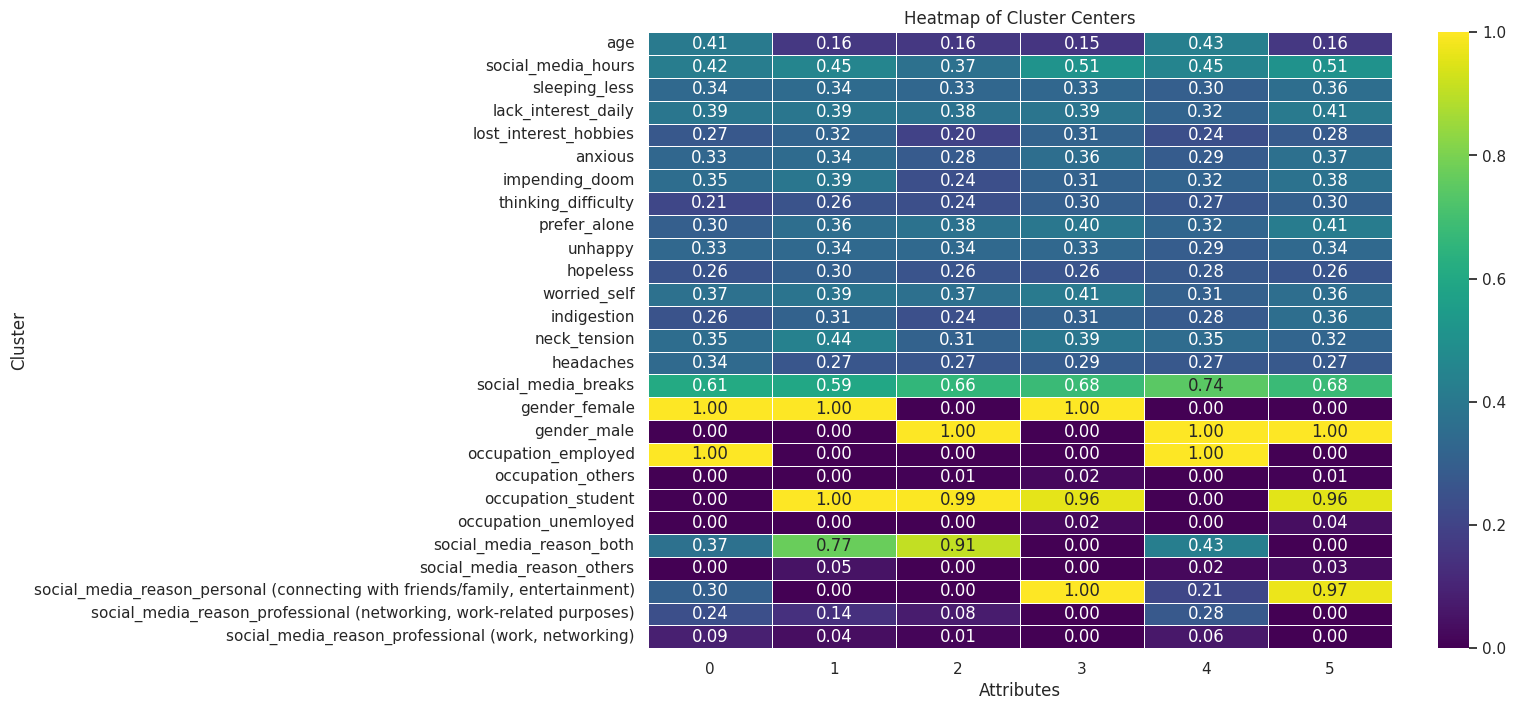

In [ ]:
 # Heatmap of Cluster Centers
 plt.figure(figsize=(12, 8))
 sns.heatmap(cluster_centers, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
 plt.title("Heatmap of Cluster Centers")
 plt.ylabel("Cluster")
 plt.xlabel("Attributes")
 plt.show()

In [ ]:

#Cluster 0: The Employed Female Social Media Breakers
#
#Detailed Characteristics: This cluster is primarily composed of employed females (Gender: Female - 1.0, Occupation: Employed - 1.0) with a moderate age (0.41) and a moderate level of social media usage (0.42). Notably, they have the highest social media break frequency (0.61) among all clusters. Their use of social media leans slightly towards both personal and professional reasons (0.37).
#
#Interpretation: This group likely represents working women who recognize the importance of disconnecting from social media for their well-being or productivity. Their work life and awareness of potential social media fatigue might contribute to their strategic break patterns.
#
#Cluster 1: The Student Female with Both Personal and Professional Reasons
#
#Detailed Characteristics: This cluster is composed of students that are primarily female with a lower age (0.16), moderate social media usage (0.45), very high personal and professional reasons (0.77), and have high social media breaks (0.59).
#
#Interpretation: This group likely represents younger, female students who use social media for their school work, projects, communication, and keeping up with current events. The use of social media for both personal and professional reasons could be the need to connect and work together.
#
#Cluster 2: The Student Males with Social Media Breaks
#
#Detailed Characteristics: The characteristics of this cluster are students that are predominantly male, lower age(0.16), medium social media usage (0.37), high social media breaks (0.66), and mostly both social media reasons.
#
#Interpretation: This group is mostly young males.
#
#Cluster 3: The Female Students with High Social Media Usage
#
#Detailed Characteristics: Predominately female students, older age, high social media usage (0.5), and high breaks (0.68)
#
#Interpretation: This group mostly spends their time on social media.
#
#Cluster 4: The Employed Males with Low Social Media Reasons
#
#Detailed Characteristics: With moderate ages (0.43), they have moderate usage of social media with high breaks but don't use social media for both purposes.
#
#Interpretation: They are mostly male, with a job, moderate usage of social media with high breaks.
#
#Cluster 5: High Personal Social Media Use
#
#Detailed Characteristics: They are younger (0.15), high breaks (0.68) but primarily use it for personal reasons.
#
#Interpretation: They are young, taking lots of social media breaks, and use social media for personal use.

In [ ]:
#In conclusion, the cluster analysis reveals distinct segments of individuals based on their social media usage, mental health indicators, demographics, and occupational status.
#
#The Role of Demographics: Gender and employment/student status are key differentiating factors. We see clusters heavily weighted towards employed females, student females, and employed males.
#
#Social Media Usage Patterns: The intensity of social media engagement varies significantly. Some clusters, like the "Social Media Breakers" (Clusters 0 and potentially others), prioritize taking breaks, suggesting a conscious effort to manage their digital well-being.
#
#Drivers of Social Media Use: Clusters differ in why they use social media. Some lean towards professional and networking purposes, while others primarily use it for personal connections and entertainment.
#
#Mental Well-being: Although not the most prominent differentiator in this analysis, there are hints that certain clusters may experience higher levels of mental health issues, which requires caution when looking at a positive or negative relationship.
#
#Uncertainty and Overlap: A clear recommendation is to examine all relevant dimensions when assessing and classifying a new incoming person.
#
#Overall, this analysis highlights the multifaceted relationship between social media, individual characteristics, and well-being. It suggests that a one-size-fits-all approach is insufficient when studying the impact of social media. Instead, considering diverse patterns of engagement, underlying motivations, and individual contexts is crucial for understanding the complexities of the digital social landscape.